### Table of content:
#### 1. Nulls/missing value check
#### 2. Correlation analysis
#### 3. Imputing NaNs/NULLs/missing numerical values using Linear Regression
#### 4. Filling missing numerical values with mean (where regression accuracy < 50%)
#### 5. Imputing NaNs/NULLs/missing categorical values using KNN classifier 
#### 6. Filling missing categorical values with mode (where KNN accuracy < 50%)
#### 7. Outlier treatment using Z-score
#### 8. Feature engineering on date

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pandas as pd
from scipy import stats

In [1]:
weather_df = pd.read_excel('Weather_AUS.xlsx')

### NULLs / missing value check

In [3]:
## get the unique elements in each column 
## only columns which has nan values
col_list = []

unique_elements_per_column = {column: weather_df[column].unique() for column in weather_df.columns}
columns_with_nan = weather_df.columns[weather_df.isna().any()].tolist()

for column, unique_elements in unique_elements_per_column.items():
    if column in columns_with_nan:
        col_list.append(column)
        #print(f'{column}: {unique_elements}')
print(col_list)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


### Correlation of numerical features

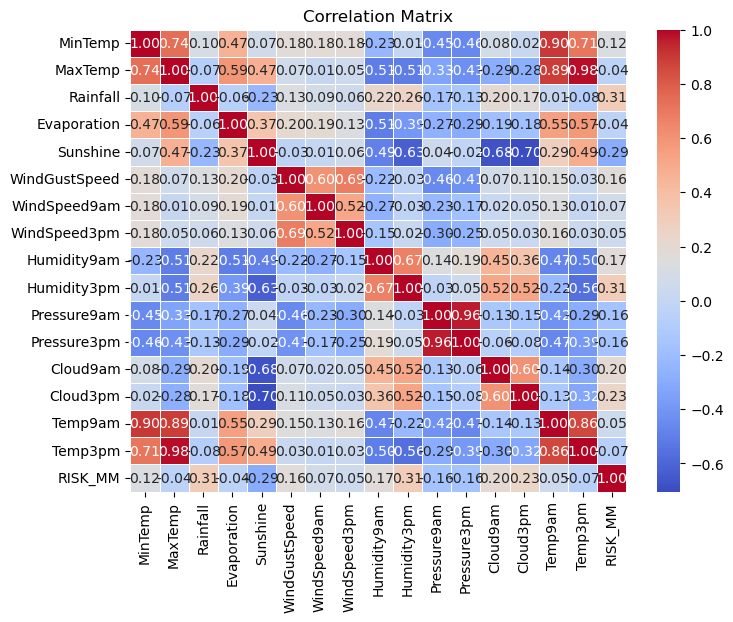

In [4]:
numerical_columns = weather_df.columns[weather_df.applymap(lambda x: isinstance(x, (int, float))).all()]

weather_df_num=weather_df[numerical_columns]
#weather_df_num

correlation_matrix = weather_df_num.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Imputing NaNs/NULLs/missing numerical values using Linear Regression

In [7]:

# Iteratively predict NaN values in each column
for target_column in weather_df_num.columns:
    # Skip non-numeric columns or columns without NaN values
    if weather_df_num[target_column].dtype not in ['float64', 'int64'] or not weather_df_num[target_column].isnull().any():
        continue

    # Identifying rows with NaN values in the target column
    nan_rows = weather_df_num[target_column].isnull()

    # Splitting the data into features (X) and target (y)
    features = weather_df_num.drop(columns=[target_column])
    target = weather_df_num[target_column]

    # Using SimpleImputer to handle missing values
    imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'
    features_imputed = imputer.fit_transform(features)

    # Excluding rows with NaN values for the current target column
    valid_indices = ~nan_rows

    # Checking if there are samples available
    if valid_indices.sum() == 0:
        print(f"No samples available for '{target_column}'.")
        continue

    # Training a linear regression model
    model = LinearRegression()
    model.fit(features_imputed[valid_indices], target[valid_indices])

    # Predicting NaN values
    predictions = model.predict(features_imputed[nan_rows])

    # Filling NaN values in the target column with predictions
    weather_df_num.loc[nan_rows, target_column] = predictions

    # Evaluating the model's accuracy (R-squared in this case)
    accuracy = r2_score(target[valid_indices], model.predict(features_imputed[valid_indices]))
    print(f"Accuracy for predicting (R2 score) '{target_column}': {accuracy:.4f}")

print("DataFrame with NaN values filled:")
#print(df)
weather_df_num


Accuracy for predicting (R2 score) 'MinTemp': 0.8821
Accuracy for predicting (R2 score) 'MaxTemp': 0.9563
Accuracy for predicting (R2 score) 'Rainfall': 0.1710
Accuracy for predicting (R2 score) 'Evaporation': 0.4465
Accuracy for predicting (R2 score) 'Sunshine': 0.6655
Accuracy for predicting (R2 score) 'WindGustSpeed': 0.6391
Accuracy for predicting (R2 score) 'WindSpeed9am': 0.4694
Accuracy for predicting (R2 score) 'WindSpeed3pm': 0.5474
Accuracy for predicting (R2 score) 'Humidity9am': 0.7464
Accuracy for predicting (R2 score) 'Humidity3pm': 0.8484
Accuracy for predicting (R2 score) 'Pressure9am': 0.9472
Accuracy for predicting (R2 score) 'Pressure3pm': 0.9484
Accuracy for predicting (R2 score) 'Cloud9am': 0.5558
Accuracy for predicting (R2 score) 'Cloud3pm': 0.5801
Accuracy for predicting (R2 score) 'Temp9am': 0.9561
Accuracy for predicting (R2 score) 'Temp3pm': 0.9814
DataFrame with NaN values filled:


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,6.213151,7.413592,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.942681,16.9,21.8,0.0
1,7.4,25.1,0.0,6.332155,9.189816,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,2.869510,3.562891,17.2,24.3,0.0
2,12.9,25.7,0.0,8.457125,10.701295,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.449462,2.000000,21.0,23.2,0.0
3,9.2,28.0,0.0,6.739466,9.293325,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,2.477265,3.224876,18.1,26.5,1.0
4,17.5,32.3,1.0,7.345887,6.130973,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,4.867481,8.349416,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,3.105251,3.445446,9.4,20.9,0.0
142189,2.8,23.4,0.0,5.381451,8.613341,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,2.570750,3.336881,10.1,22.4,0.0
142190,3.6,25.3,0.0,5.455223,9.062910,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,2.565824,3.090314,10.9,24.5,0.0
142191,5.4,26.9,0.0,6.358853,8.840999,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,2.708688,3.399507,12.5,26.1,0.0


### Filling missing numerical values with mean (where regression accuracy < 50%)

In [8]:
mean_imp_df = weather_df[['Rainfall','Evaporation','WindSpeed9am']]

mean_imp_df_Rainfall = mean_imp_df['Rainfall'].mean()
mean_imp_df_Evaporation = mean_imp_df['Evaporation'].mean()
mean_imp_df_WindSpeed9am = mean_imp_df['WindSpeed9am'].mean()

mean_imp_df['Rainfall'] = mean_imp_df['Rainfall'].fillna(mean_imp_df_Rainfall)
mean_imp_df['Evaporation'] = mean_imp_df['Evaporation'].fillna(mean_imp_df_Evaporation)
mean_imp_df['WindSpeed9am'] = mean_imp_df['WindSpeed9am'].fillna(mean_imp_df_WindSpeed9am)

#mean_imp_df

weather_df_num['Rainfall'] = mean_imp_df['Rainfall']
weather_df_num['Evaporation'] = mean_imp_df['Evaporation']
weather_df_num['WindSpeed9am'] = mean_imp_df['WindSpeed9am']

categorical_columns = weather_df.select_dtypes(include=['object']).columns

categorical_filtered_data = weather_df[categorical_columns]
categorical_filtered_data_noty = categorical_filtered_data.drop('RainTomorrow', axis=1)
#categorical_filtered_data_noty

cat_imp_df = pd.merge(categorical_filtered_data_noty, weather_df_num, left_index=True, right_index=True)
cat_num_imp_df = cat_imp_df.copy()

### Imputing NaNs/NULLs/missing categorical values using KNN classifier 

In [9]:

# Identifying object-type columns with NaN values
object_columns_with_nan = cat_imp_df.select_dtypes(include='object').columns[cat_imp_df.select_dtypes(include='object').isnull().any()].tolist()

# Iterating over each column with NaN values
for target_column in object_columns_with_nan:
    # Identifing rows with NaN values in the target column
    nan_rows = cat_imp_df[target_column].isnull()

    # Using all other columns as features
    features = cat_imp_df.drop(columns=[target_column])

    # One-hot encode categorical features
    features_encoded = pd.get_dummies(features, drop_first=True)

    # Converting DataFrame to NumPy array
    X_train = features_encoded[~nan_rows].to_numpy()
    y_train = cat_imp_df.loc[~nan_rows, target_column].to_numpy()

    X_test = features_encoded[nan_rows].to_numpy()

    # Train a k-NN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(X_train, y_train)

    # Predicting NaN values
    predictions = knn_classifier.predict(X_test)

    # Filling NaN values in the target column with predictions
    cat_imp_df.loc[nan_rows, target_column] = predictions

    # Evaluating the model's accuracy
    accuracy = accuracy_score(y_train, knn_classifier.predict(X_train))
    print(f"Accuracy for predicting (training accuracy)'{target_column}': {accuracy:.4f}")

print("DataFrame with NaN values filled:")
#print(df)
cat_imp_df


Accuracy for predicting (training accuracy)'WindGustDir': 0.4653
Accuracy for predicting (training accuracy)'WindDir9am': 0.4688
Accuracy for predicting (training accuracy)'WindDir3pm': 0.4724
Accuracy for predicting (training accuracy)'RainToday': 0.9385
DataFrame with NaN values filled:


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,Albury,W,W,WNW,No,13.4,22.9,0.6,5.469824,7.413592,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.942681,16.9,21.8,0.0
1,Albury,WNW,NNW,WSW,No,7.4,25.1,0.0,5.469824,9.189816,...,22.0,44.0,25.0,1010.6,1007.8,2.869510,3.562891,17.2,24.3,0.0
2,Albury,WSW,W,WSW,No,12.9,25.7,0.0,5.469824,10.701295,...,26.0,38.0,30.0,1007.6,1008.7,2.449462,2.000000,21.0,23.2,0.0
3,Albury,NE,SE,E,No,9.2,28.0,0.0,5.469824,9.293325,...,9.0,45.0,16.0,1017.6,1012.8,2.477265,3.224876,18.1,26.5,1.0
4,Albury,W,ENE,NW,No,17.5,32.3,1.0,5.469824,6.130973,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,E,ESE,E,No,3.5,21.8,0.0,5.469824,8.349416,...,13.0,59.0,27.0,1024.7,1021.2,3.105251,3.445446,9.4,20.9,0.0
142189,Uluru,E,SE,ENE,No,2.8,23.4,0.0,5.469824,8.613341,...,11.0,51.0,24.0,1024.6,1020.3,2.570750,3.336881,10.1,22.4,0.0
142190,Uluru,NNW,SE,N,No,3.6,25.3,0.0,5.469824,9.062910,...,9.0,56.0,21.0,1023.5,1019.1,2.565824,3.090314,10.9,24.5,0.0
142191,Uluru,N,SE,WNW,No,5.4,26.9,0.0,5.469824,8.840999,...,9.0,53.0,24.0,1021.0,1016.8,2.708688,3.399507,12.5,26.1,0.0


### Filling missing categorical values with mode (where KNN accuracy < 50%)

In [10]:
mode_per_group_weather_df = weather_df.groupby('Location')['WindGustDir'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
mode_value = mode_per_group_weather_df['WindGustDir'].mode().iloc[0] if not mode_per_group_weather_df['WindGustDir'].mode().empty else None
mode_per_group_weather_df['WindGustDir'] = mode_per_group_weather_df['WindGustDir'].fillna(mode_value)
mode_WindGustDir = mode_per_group_weather_df.copy()

mode_per_group_weather_df = weather_df.groupby('Location')['WindDir9am'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
mode_value = mode_per_group_weather_df['WindDir9am'].mode().iloc[0] if not mode_per_group_weather_df['WindDir9am'].mode().empty else None
mode_per_group_weather_df['WindDir9am'] = mode_per_group_weather_df['WindDir9am'].fillna(mode_value)
mode_WindDir9am = mode_per_group_weather_df.copy()

mode_per_group_weather_df = weather_df.groupby('Location')['WindDir3pm'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
mode_value = mode_per_group_weather_df['WindDir3pm'].mode().iloc[0] if not mode_per_group_weather_df['WindDir3pm'].mode().empty else None
mode_per_group_weather_df['WindDir3pm'] = mode_per_group_weather_df['WindDir3pm'].fillna(mode_value)
mode_WindDir3pm = mode_per_group_weather_df.copy()

mode_per_group_weather_df_f = pd.merge(mode_WindGustDir, mode_WindDir9am, on='Location', how='inner')
mode_per_group_weather_df_f = pd.merge(mode_per_group_weather_df_f, mode_WindDir3pm, on='Location', how='inner')
mode_per_group_weather_df_f = mode_per_group_weather_df_f.rename(columns={'WindGustDir':'WindGustDir_imp'
                                                                        , 'WindDir9am':'WindDir9am_imp'
                                                                        , 'WindDir3pm':'WindDir3pm_imp'})
#mode_per_group_weather_df_f

weather_df_cat_null_imp = pd.merge(weather_df, mode_per_group_weather_df_f, on='Location', how='left')

weather_df_cat_null_imp['WindGustDir'] = np.where(pd.isnull(weather_df_cat_null_imp['WindGustDir'])
                                                     , weather_df_cat_null_imp['WindGustDir_imp']
                                                     , weather_df_cat_null_imp['WindGustDir'])

weather_df_cat_null_imp['WindDir9am'] = np.where(pd.isnull(weather_df_cat_null_imp['WindDir9am'])
                                                     , weather_df_cat_null_imp['WindDir9am_imp']
                                                     , weather_df_cat_null_imp['WindDir9am'])

weather_df_cat_null_imp['WindDir3pm'] = np.where(pd.isnull(weather_df_cat_null_imp['WindDir3pm'])
                                                     , weather_df_cat_null_imp['WindDir3pm_imp']
                                                     , weather_df_cat_null_imp['WindDir3pm'])


weather_df_cat_null_imp_mode = weather_df_cat_null_imp[['Date','WindGustDir','WindDir9am','WindDir3pm']]
#weather_df_cat_null_imp_mode

In [11]:
cat_imp_df = cat_imp_df[['RainToday']]
#cat_imp_df

cat_num_imp_df = cat_num_imp_df.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)
#cat_num_imp_df

weather_df_y = weather_df[['RainTomorrow']]
#weather_df_y

weather_df_imp = pd.merge(weather_df_cat_null_imp_mode, cat_num_imp_df, left_index=True, right_index=True)
weather_df_imp = pd.merge(weather_df_imp, cat_imp_df, left_index=True, right_index=True)
weather_df_imp = pd.merge(weather_df_imp, weather_df_y, left_index=True, right_index=True)
weather_df_imp

,Date,WindGustDir,WindDir9am,WindDir3pm,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainToday,RainTomorrow
0,2008-12-01,W,W,WNW,Albury,13.4,22.9,0.6,5.469824,7.413592,...,22.0,1007.7,1007.1,8.000000,4.942681,16.9,21.8,0.0,No,No
1,2008-12-02,WNW,NNW,WSW,Albury,7.4,25.1,0.0,5.469824,9.189816,...,25.0,1010.6,1007.8,2.869510,3.562891,17.2,24.3,0.0,No,No
2,2008-12-03,WSW,W,WSW,Albury,12.9,25.7,0.0,5.469824,10.701295,...,30.0,1007.6,1008.7,2.449462,2.000000,21.0,23.2,0.0,No,No
3,2008-12-04,NE,SE,E,Albury,9.2,28.0,0.0,5.469824,9.293325,...,16.0,1017.6,1012.8,2.477265,3.224876,18.1,26.5,1.0,No,No
4,2008-12-05,W,ENE,NW,Albury,17.5,32.3,1.0,5.469824,6.130973,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.2,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,E,ESE,E,Uluru,3.5,21.8,0.0,5.469824,8.349416,...,27.0,1024.7,1021.2,3.105251,3.445446,9.4,20.9,0.0,No,No
142189,2017-06-21,E,SE,ENE,Uluru,2.8,23.4,0.0,5.469824,8.613341,...,24.0,1024.6,1020.3,2.570750,3.336881,10.1,22.4,0.0,No,No
142190,2017-06-22,NNW,SE,N,Uluru,3.6,25.3,0.0,5.469824,9.062910,...,21.0,1023.5,1019.1,2.565824,3.090314,10.9,24.5,0.0,No,No
142191,2017-06-23,N,SE,WNW,Uluru,5.4,26.9,0.0,5.469824,8.840999,...,24.0,1021.0,1016.8,2.708688,3.399507,12.5,26.1,0.0,No,No


#### Extracting EDA dataframe

In [12]:
weather_df_imp_eda = weather_df_imp.copy()
weather_df_imp_eda.to_csv('weather_df_imp_eda.csv')

### Outlier treatment using Z-score

In [14]:
def treat_outliers(column):
    z_scores = np.abs(stats.zscore(column))
    threshold = 3
    return np.where(z_scores > threshold, column.median(), column)

# Applying outlier treatment to all numerical columns
df_numeric = weather_df_imp.select_dtypes(include='number')
weather_df_imp[df_numeric.columns] = df_numeric.apply(treat_outliers, axis=0)


### Feature engineering from date column

In [15]:
weather_df_imp['Date'] = pd.to_datetime(weather_df_imp['Date'])
weather_df_imp['Month'] = weather_df_imp['Date'].dt.month
#weather_df_imp.Month.unique()

season_mapping = {
    1: 'Spring', 2: 'Spring', 3: 'Spring',
    4: 'Summer', 5: 'Summer', 6: 'Summer',
    7: 'Fall', 8: 'Fall', 9: 'Fall',
    10: 'Holiday', 11: 'Holiday', 12: 'Holiday'
}

weather_df_imp['Season'] = weather_df_imp['Month'].map(season_mapping)
weather_df_imp

,Date,WindGustDir,WindDir9am,WindDir3pm,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainToday,RainTomorrow,Month,Season
0,2008-12-01,W,W,WNW,Albury,13.4,22.9,0.6,5.469824,7.413592,...,1007.1,8.000000,4.942681,16.9,21.8,0.0,No,No,12,Holiday
1,2008-12-02,WNW,NNW,WSW,Albury,7.4,25.1,0.0,5.469824,9.189816,...,1007.8,2.869510,3.562891,17.2,24.3,0.0,No,No,12,Holiday
2,2008-12-03,WSW,W,WSW,Albury,12.9,25.7,0.0,5.469824,10.701295,...,1008.7,2.449462,2.000000,21.0,23.2,0.0,No,No,12,Holiday
3,2008-12-04,NE,SE,E,Albury,9.2,28.0,0.0,5.469824,9.293325,...,1012.8,2.477265,3.224876,18.1,26.5,1.0,No,No,12,Holiday
4,2008-12-05,W,ENE,NW,Albury,17.5,32.3,1.0,5.469824,6.130973,...,1006.0,7.000000,8.000000,17.8,29.7,0.2,No,No,12,Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,E,ESE,E,Uluru,3.5,21.8,0.0,5.469824,8.349416,...,1021.2,3.105251,3.445446,9.4,20.9,0.0,No,No,6,Summer
142189,2017-06-21,E,SE,ENE,Uluru,2.8,23.4,0.0,5.469824,8.613341,...,1020.3,2.570750,3.336881,10.1,22.4,0.0,No,No,6,Summer
142190,2017-06-22,NNW,SE,N,Uluru,3.6,25.3,0.0,5.469824,9.062910,...,1019.1,2.565824,3.090314,10.9,24.5,0.0,No,No,6,Summer
142191,2017-06-23,N,SE,WNW,Uluru,5.4,26.9,0.0,5.469824,8.840999,...,1016.8,2.708688,3.399507,12.5,26.1,0.0,No,No,6,Summer


In [ ]:
columns_with_nan = weather_df_imp.columns[weather_df_imp.isna().any()].tolist()

print(f'Columns with NaN values: {columns_with_nan}')

#### Extracting modelling dataframe

In [17]:
weather_df_final = weather_df_imp.copy()
weather_df_final.to_csv('weather_df_final.csv')